<a href="https://colab.research.google.com/github/billiahkerubo1/Nairobi-Hospital-Hypothyroid-Analysis/blob/main/Nairobi_Hospital_Hypothyroid_Analysis_Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***NAIROBI HOSPITAL HYPOTHYROID ANALYSIS***

# Defining the question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. As an analyst, I will use the healthcare datasets provided to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

# Specifying the question

Does the patient's symptoms indicate that the patient has hypothyroid?

# Defining the metrics of success

The metrics of success are the root mean square error, the confusion matrix and the accuracy score. The smaller the error the better the model and algorithm of classification. For F1 score, the closer the value is closer to 1, the better the model.

# Understanding the context

Hypothyroid is a condition of low activity of the thyroid glands, leading to slow growth in children and mental illness. Several records are made on the patients, indicating the measurements taken, whether they are under medication or not, their age and gender, and the type of medications as well as their symptoms. The aim of the analysis is to ensure whether the symptoms shown and the records led to the proper diagnosis of whwther the patients have hypothyroid or not. The classification algorithms used are random forests, SVM, gradient boosted trees and adaboosted trees. The metrics of the models used include confusion matrix and the accuracy score.

# Recording the Experimental Design

1 Exploratory Data Analysis

2 Data Cleaning

3 Univariate, Bivariate Analysis

4 Visualizations

5.Challenging the solution: The solution was challenged through the hyperparameter tuning to see whether the accuracy improved.

# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Loading and understanding data

In [2]:
data = pd.read_csv('/content/hypothyroid.csv')

In [3]:
# previewing the first records
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [4]:
#previewing the last records
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [5]:
# checking the size of the dataset
data.shape

(3163, 26)

The data has 3163 rows and 26 columns

In [6]:
# checking the data columns
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [7]:
#checking for information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [8]:
#checking datatypes
data.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [11]:
from dataclasses import dataclass
#changing datatypes
numerical_col = data[['age', 'TSH','T3', 'T4U','TT4','FTI']]

categorical_col = data[['sex', 'status', 'TSH_measured','T3_measured', 'TT4_measured','T4U_measured', 'FTI_measured','TBG_measured']]

boolean_col = data[['on_thyroxine','query_on_thyroxine', 'on_antithyroid_medication','thyroid_surgery', 'query_hypothyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']]

# Boolean columns
for column in boolean_col:
  data[column] = data[column].replace('f', False)
  data[column] = data[column].replace('t', True)

# for loop to change the columns
for column in data.columns:
  if column in numerical_col:
    data[column] = data[column].astype('float')
  elif column in categorical_col:
    data[column] = data[column].astype('object')
  elif column in boolean_col:
    data[column] = data[column].astype('bool')


In [12]:
data.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                    bool
query_on_thyroxine              bool
on_antithyroid_medication       bool
thyroid_surgery                 bool
query_hypothyroid               bool
query_hyperthyroid            object
pregnant                        bool
sick                            bool
tumor                           bool
lithium                         bool
goitre                          bool
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                           object
dtype: object

The datatypes have been changed to the correct ones.

In [10]:
#checking for unique values
data.nunique()

status                         2
age                           92
sex                            2
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          239
T3_measured                    2
T3                            69
TT4_measured                   2
TT4                          268
T4U_measured                   2
T4U                          158
FTI_measured                   2
FTI                          280
TBG_measured                   2
TBG                           52
dtype: int64

In [9]:
 #replacing '?' with nan
data.replace('?', np.NaN, inplace = True)

In [13]:
#checking for null values
data.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [14]:
#making a copy before changes
data2 = data.copy()

In [15]:
# dealing with missing values
# dealing with null values
data2.sex.fillna(data2.sex.mode()[0],inplace = True)


In [16]:
columns = data2[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
for column in columns:
 data2[column].fillna(data2[column].mean(), inplace = True)

In [17]:
#checking null values again
data2.isnull().sum()

status                          0
age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                             0
T3_measured                     0
T3                              0
TT4_measured                    0
TT4                             0
T4U_measured                    0
T4U                             0
FTI_measured                    0
FTI                             0
TBG_measured                    0
TBG                          2903
dtype: int64

In [18]:
#dropping the TBG column
data2.drop(['TBG'], axis = 1, inplace = True)

In [19]:
data2.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

The null values have been dropped.

In [32]:
#checking for duplicated values
data2.duplicated().sum()


156

There are 156 duplicated values

In [20]:
#dropping duplicates
data2.drop_duplicates(inplace = True)

In [21]:
#checking for the duplicates once again
data2.duplicated().sum()

0

The duplicate values have been dropped.

# 3. Exploratory Data Analysis

## a. Univariate Analysis

In [23]:
#  checking for standard deviation, variance, skewness and kurtosis and the mean
for column in numerical_col:
  print('\n')
  print(column + ',Mean: ' + str(data2[column].mean()))
  print(column + ', Standard deviation: '+ str(data2[column].std()))
  print(column + ', Variance: '+ str(data2[column].var()))
  print(column + ', Skewness: '+ str(data2[column].skew()))
  print(column + ', Kurtosis: '+ str(data2[column].kurt()))



age,Mean: 51.3500302753277
age, Standard deviation: 17.864730565566024
age, Variance: 319.14859818026895
age, Skewness: -0.19784403314342464
age, Kurtosis: -0.6106397545900806


TSH,Mean: 5.823556922530171
TSH, Standard deviation: 22.47060249328132
TSH, Variance: 504.9279764110607
TSH, Skewness: 11.000065170998116
TSH, Kurtosis: 175.9888075948102


T3,Mean: 1.9348816160455327
T3, Standard deviation: 0.8761203000159574
T3, Variance: 0.7675867801000512
T3, Skewness: 2.4179957096881046
T3, Kurtosis: 14.419929959213274


T4U,Mean: 0.9775928950230998
T4U, Standard deviation: 0.2197046314337629
T4U, Variance: 0.0482701250734456
T4U, Skewness: 0.9780648992093242
T4U, Kurtosis: 3.7920396931769007


TT4,Mean: 108.71458264050557
TT4, Standard deviation: 43.39572045616085
TT4, Variance: 1883.1885539092577
TT4, Skewness: 1.5082005775938354
TT4, Kurtosis: 7.405392003957854


FTI,Mean: 115.48425193752333
FTI, Standard deviation: 58.535310399089646
FTI, Variance: 3426.3825635177727
FTI, Skewness: 5

In [24]:
# Interquantile range

for column in numerical_col:
  print('\n')
  print(data2[column].quantile([0.25, 0.5, 0.75]))



0.25    38.000000
0.50    51.154214
0.75    64.000000
Name: age, dtype: float64


0.25    0.0
0.50    1.0
0.75    5.3
Name: TSH, dtype: float64


0.25    1.500000
0.50    1.939749
0.75    2.200000
Name: T3, dtype: float64


0.25    0.86
0.50    0.97
0.75    1.06
Name: T4U, dtype: float64


0.25     85.0
0.50    106.0
0.75    125.0
Name: TT4, dtype: float64


0.25     92.0
0.50    109.0
0.75    126.0
Name: FTI, dtype: float64


In [75]:
data2['status'].value_counts()

1    2866
0     141
Name: status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


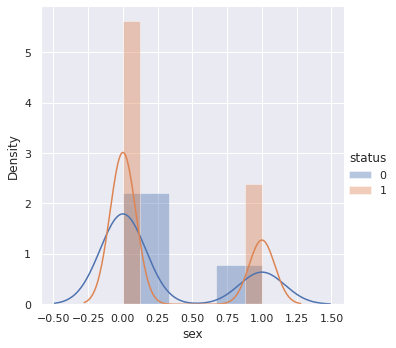

In [76]:
# distribution plots
sns.FacetGrid(data2,hue = 'status', size = 5).map(sns.distplot, 'sex').add_legend()

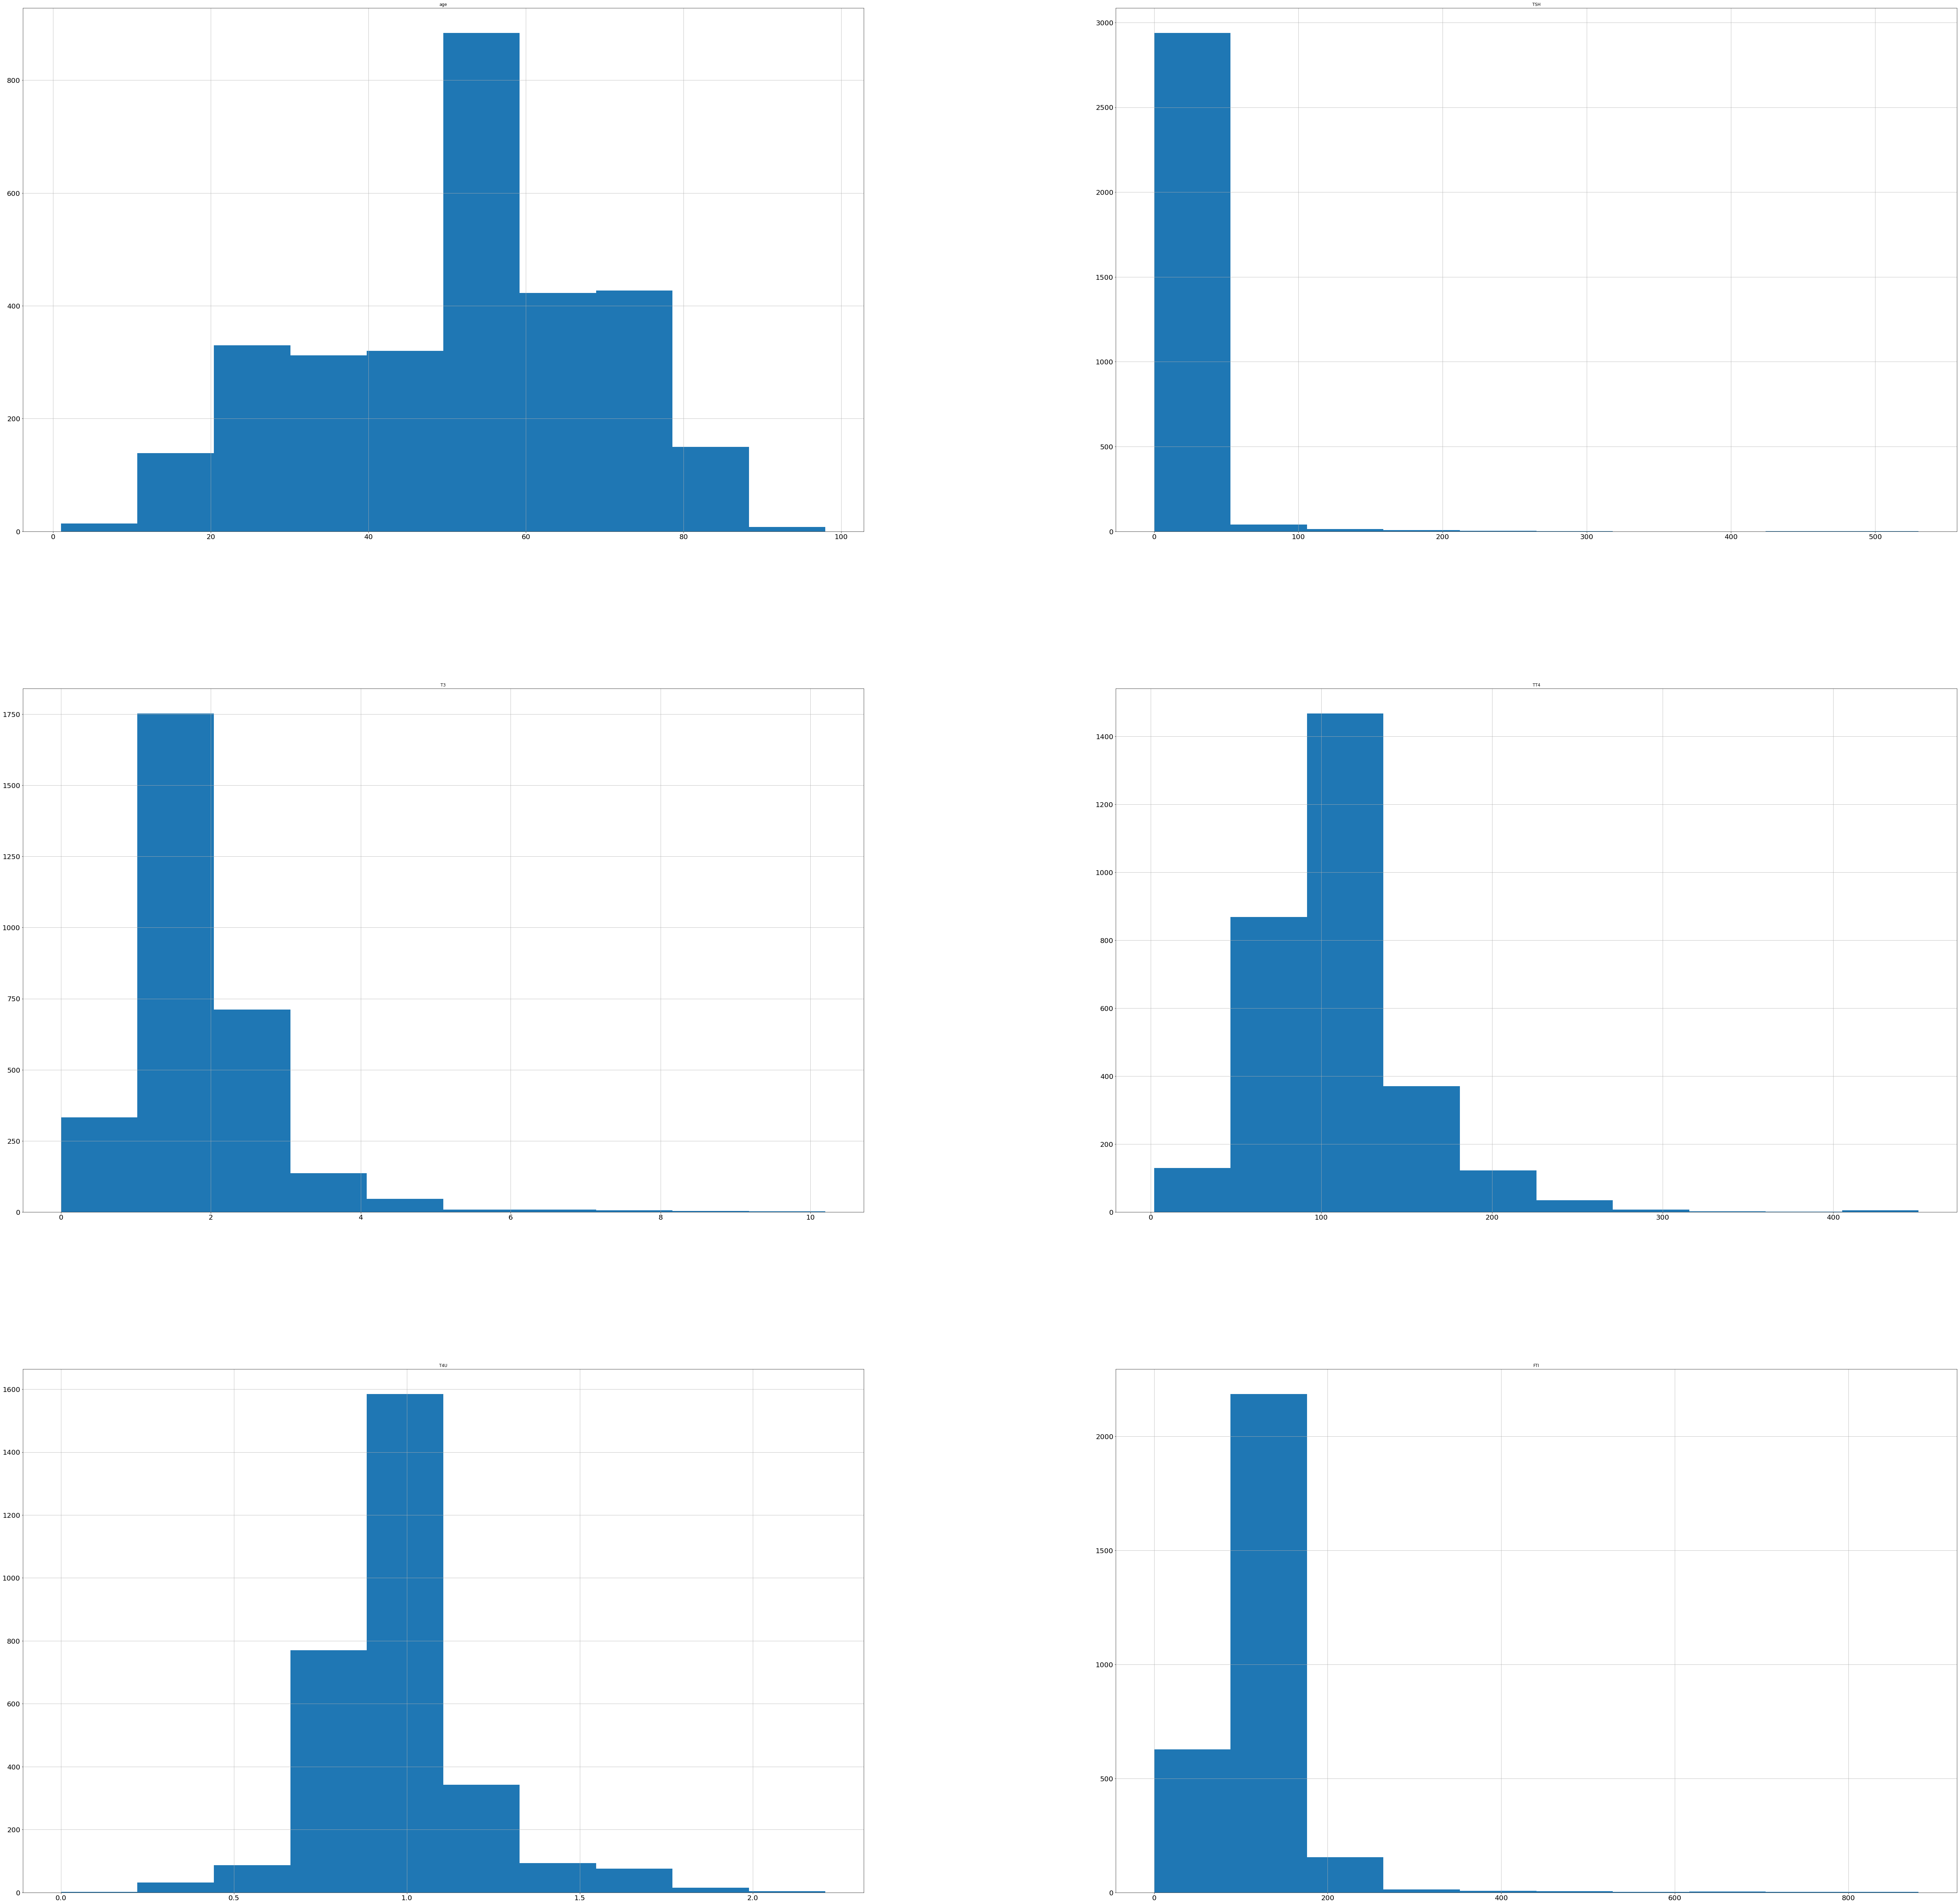

In [25]:
# histograms to show distributions
data2.hist(figsize=(100,100), sharex=False, sharey=False, xlabelsize= 20, ylabelsize=20)
plt.show()

The data is not normally distributed, calling for scaling.

## b. Bivariate Analysis

In [26]:
# Check for correlation to see how the variables influence each other

correlations = data2.corr()
correlations

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.005034,-0.021795,-0.061838,-0.015037,0.039948,-0.161615,0.061513,-0.066068,-0.022171,-0.039419,-0.007766,-0.269517,-0.087480,-0.191304,0.018105
on_thyroxine,-0.005034,1.000000,-0.015066,-0.025749,0.029442,0.063253,-0.000316,-0.065599,-0.023953,-0.010766,-0.027231,-0.005348,0.023863,0.217741,0.071352,0.113612
query_on_thyroxine,-0.021795,-0.015066,1.000000,-0.016246,0.015229,-0.021251,-0.019641,-0.024921,0.049138,-0.003521,0.003723,-0.014464,-0.014861,-0.020323,-0.034770,-0.004649
on_antithyroid_medication,-0.061838,-0.025749,-0.016246,1.000000,-0.006834,-0.034654,0.002975,-0.021730,-0.013819,-0.003070,-0.021497,-0.000977,0.065709,-0.002692,0.026532,-0.017826
thyroid_surgery,-0.015037,0.029442,0.015229,-0.006834,1.000000,-0.000338,-0.014130,-0.034384,-0.021867,-0.004859,-0.023563,0.012127,-0.007009,-0.016125,0.026097,-0.026121
query_hypothyroid,0.039948,0.063253,-0.021251,-0.034654,-0.000338,1.000000,-0.015531,-0.053159,-0.033807,0.040546,-0.024256,0.066924,-0.038914,-0.010978,0.044432,-0.046316
pregnant,-0.161615,-0.000316,-0.019641,0.002975,-0.014130,-0.015531,1.000000,-0.026272,0.003883,-0.003712,0.081900,-0.012414,0.201944,0.171295,0.323426,-0.005423
sick,0.061513,-0.065599,-0.024921,-0.021730,-0.034384,-0.053159,-0.026272,1.000000,-0.021199,-0.004710,-0.032977,-0.006288,-0.103513,-0.042186,-0.047742,-0.023502
tumor,-0.066068,-0.023953,0.049138,-0.013819,-0.021867,-0.033807,0.003883,-0.021199,1.000000,-0.002995,-0.020972,-0.019174,0.026517,-0.014711,0.024746,-0.026980
lithium,-0.022171,-0.010766,-0.003521,-0.003070,-0.004859,0.040546,-0.003712,-0.004710,-0.002995,1.000000,-0.004660,-0.001462,0.015171,-0.002209,0.039039,-0.017184


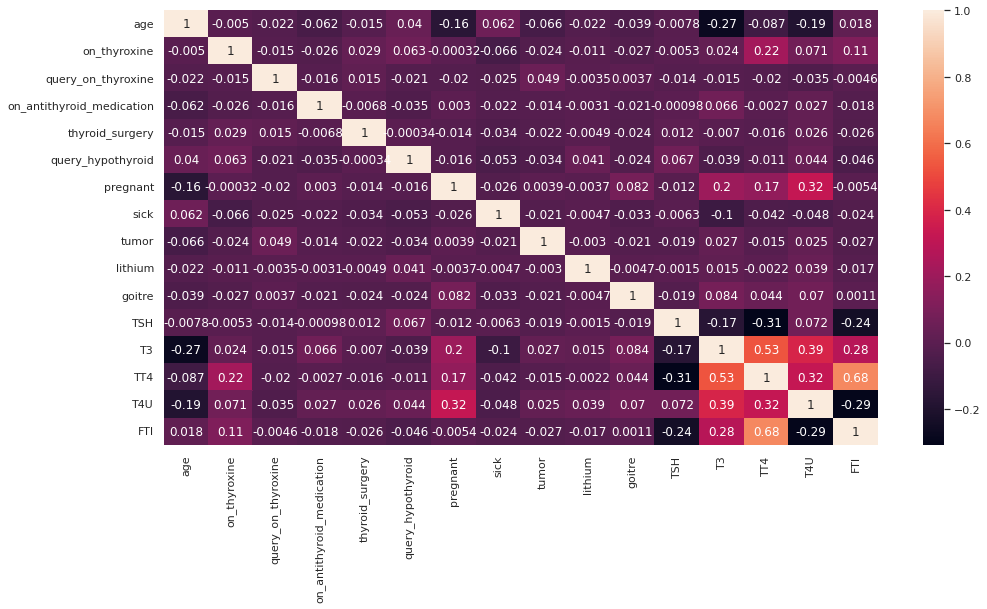

In [27]:
#correlation between variables on a heatmap
correlation = data2.corr()
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(correlation,xticklabels = correlation.columns, yticklabels = correlation.columns, annot=True)


Th variables in the dataset are lowly correlated, with the best ccorrelation being between FTI and TT4 by a value of 0.68. The second best correlation is between TT4 and T3 by a value of 0.53. An increase in the level of TT4 influences an increase in T3 by 53% and vice versa.

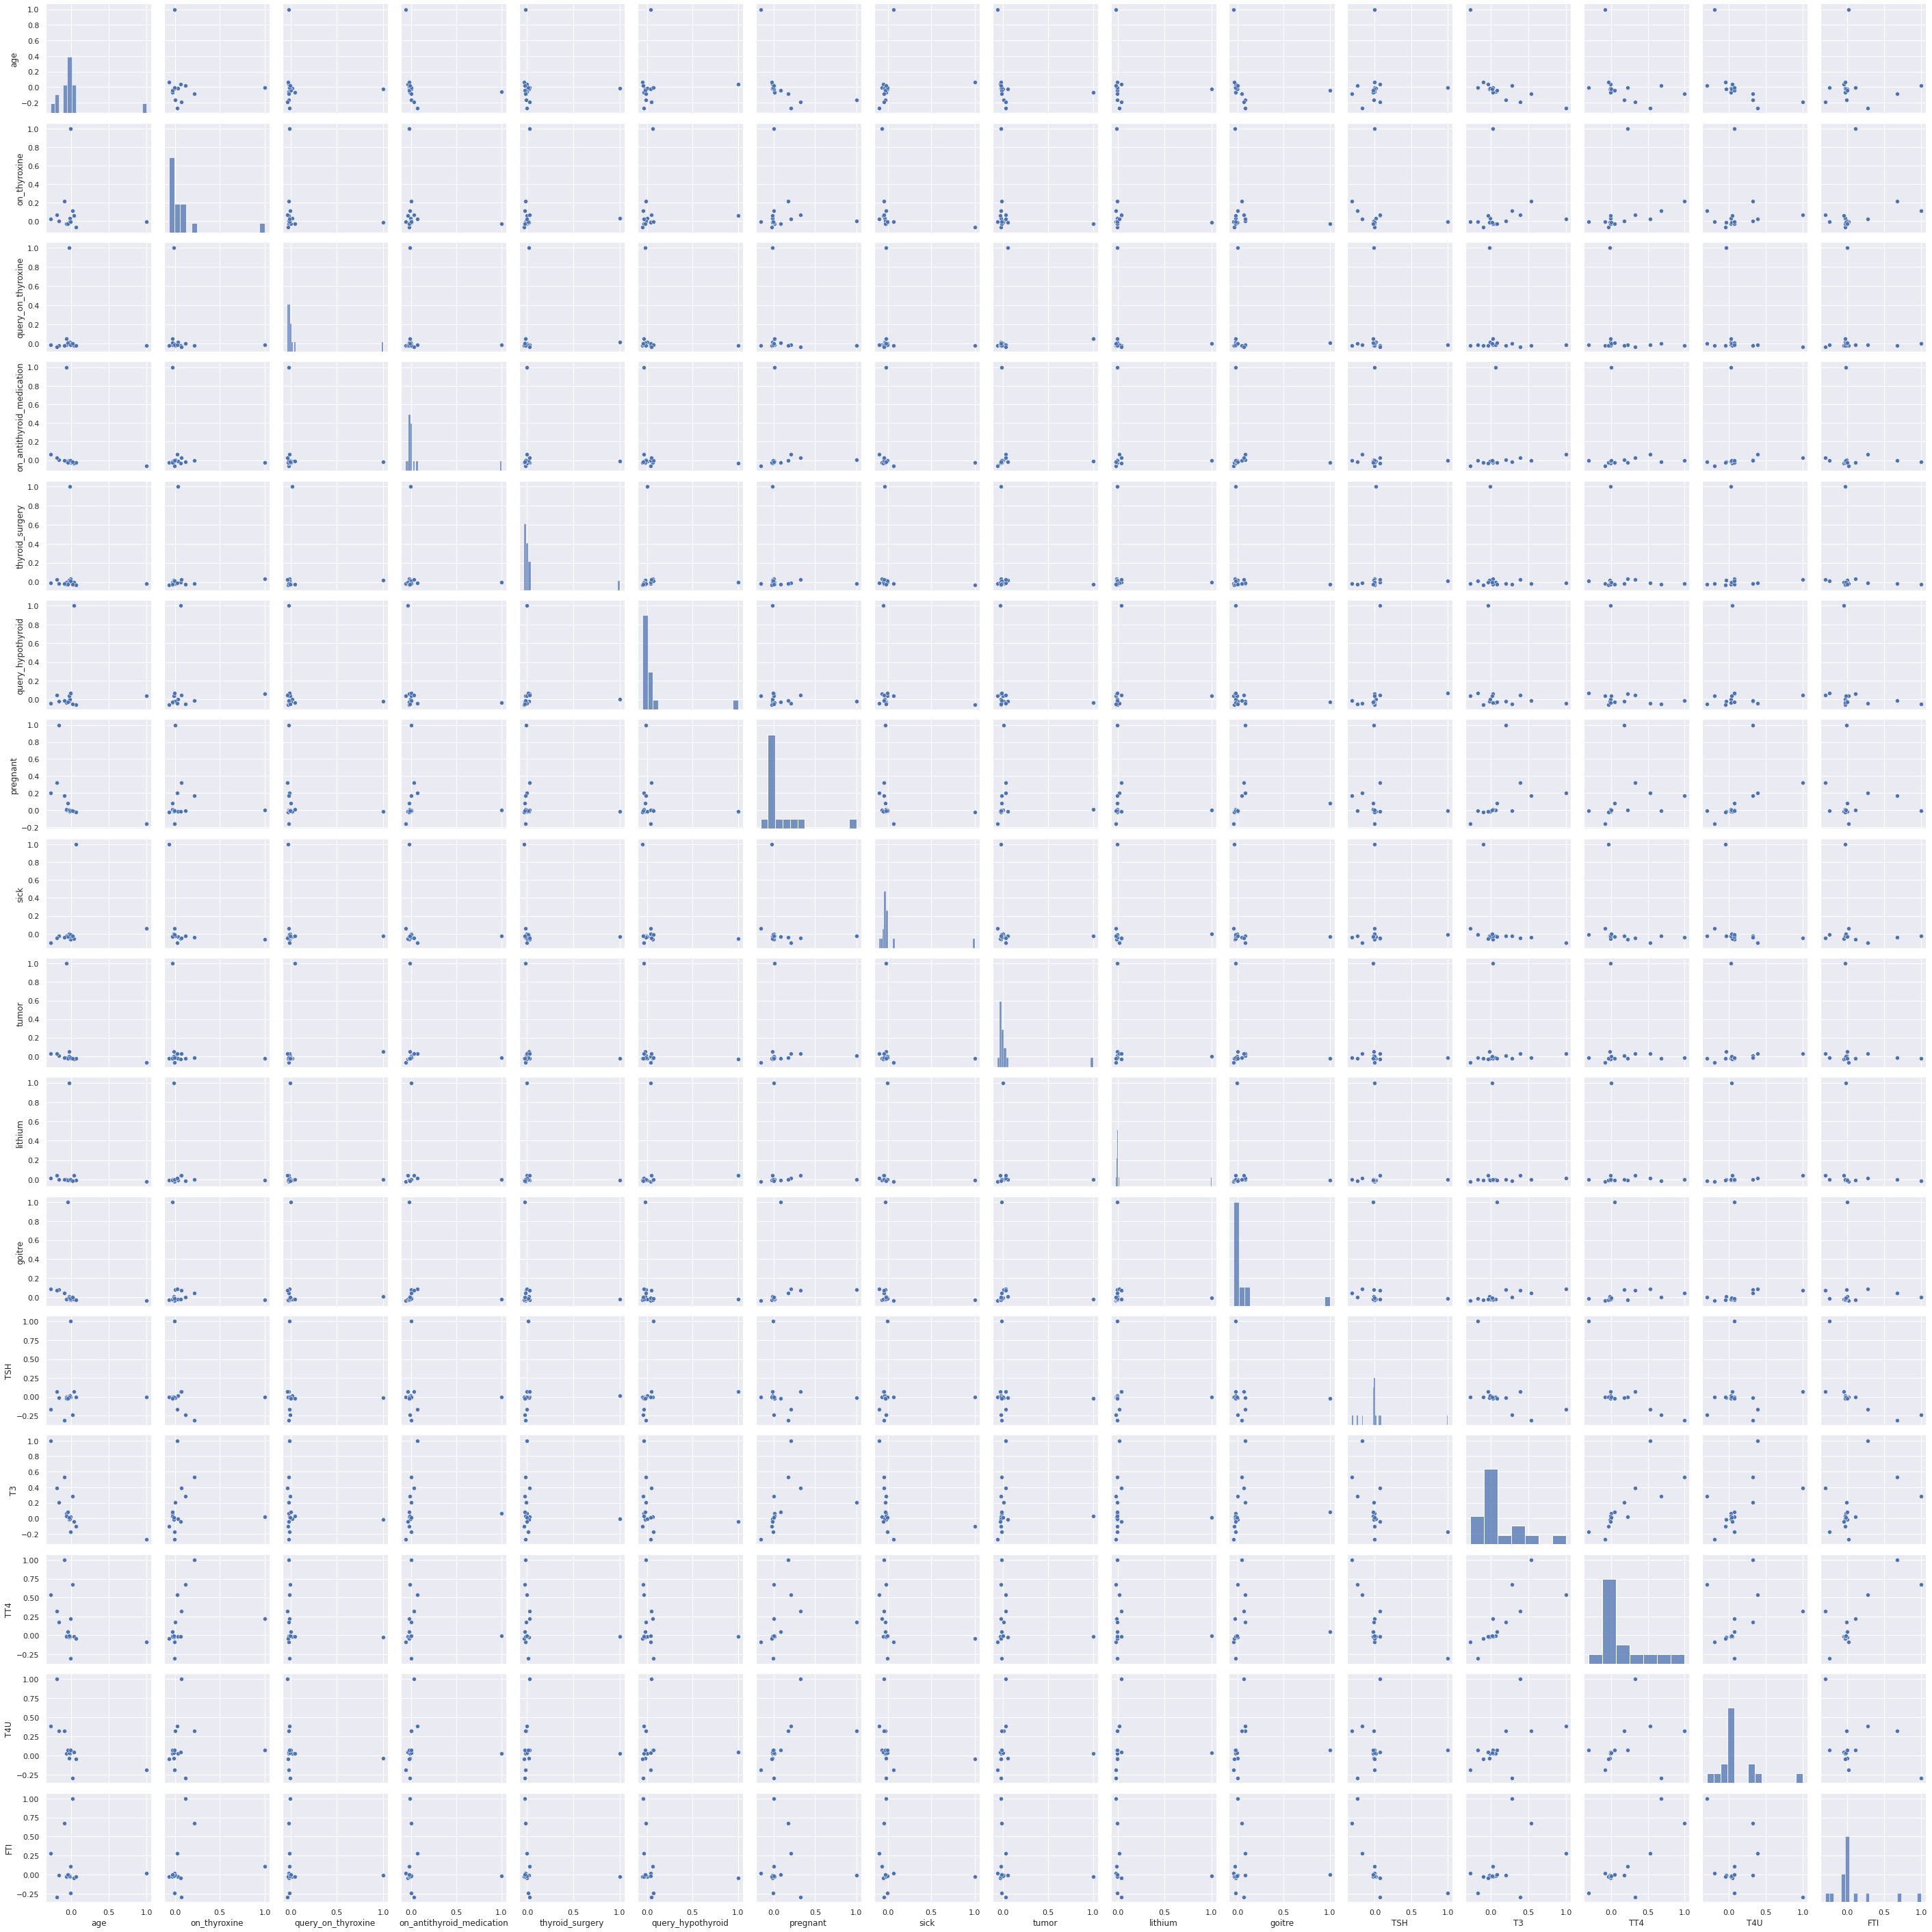

In [28]:
 # Description using paiplot
sns.pairplot(correlation)
plt.show()

The pairplot visualizes the above correlation.

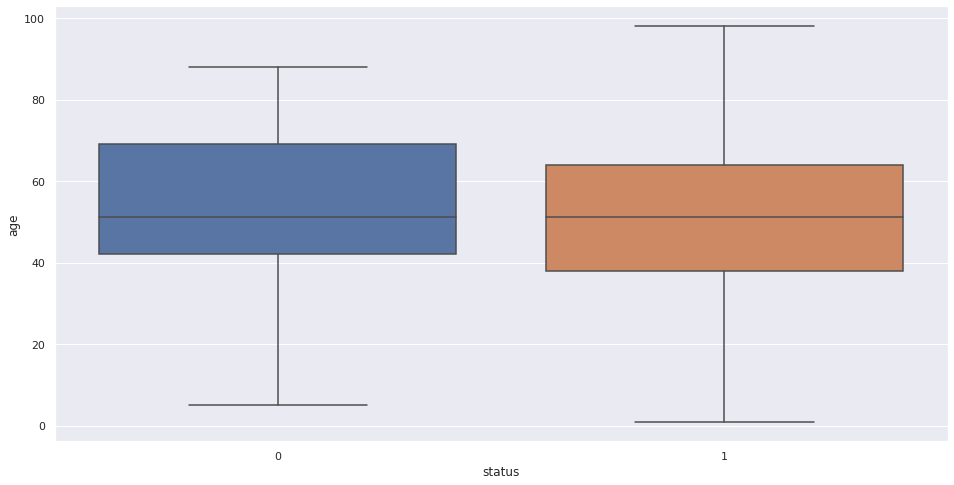

In [78]:
# Boxplot
sns.boxplot(x = 'status', y = 'age', data = data2)
plt.show()

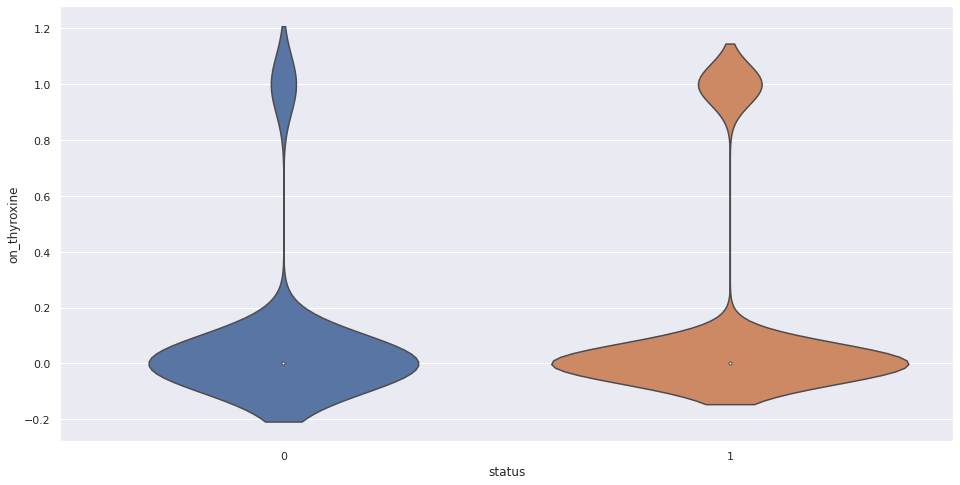

In [79]:
#violin plot
sns.violinplot(x = 'status', y = 'on_thyroxine', data = data2, size = 6)
plt.show()

# 4. Classification Analysis

## i. Decision Trees

The classification algorithms to be used in this case are Random forests, adaboosted trees and gradient boosted trees. We will get to measure how effective they are in classification as well as the best algorithm of the three.

### a. Gradient Boosting

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Gradient boosting models can perform incredibly well on very complex datasets, but they are also prone to overfitting, which can be combated with several methods.

In [29]:
# importing the necessary libraries for this algorithm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [30]:
# Encoding data
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

columns_to_be_encoded = ['status', 'sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured', 'FTI_measured','TBG_measured']


# Instantiate the encoders
encoders = {column: LabelEncoder() for column in columns_to_be_encoded}

for column in columns_to_be_encoded:
    data2[column] = encoders[column].fit_transform(data2[column])


In [31]:
#checking the encoded data
data2.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0


In [32]:
#data preparation for training
# 1. determining the features and the target data
X = data2.drop('status',axis='columns')
y = data2.status


In [33]:
# 2. Dividing the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
# 3. Feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# setting different values of learning rate will help in determine the optimal value for this case
learningr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in learningr_list:
    gb_classifier = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_classifier.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)

    print("Accuracy score (training): {0:.3f}".format(gb_classifier.score(X_train, y_train)))
    
    print("Accuracy score (validation): {0:.3f}".format(gb_classifier.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.952
Accuracy score (validation): 0.958
Learning rate:  0.075
Accuracy score (training): 0.964
Accuracy score (validation): 0.967
Learning rate:  0.1
Accuracy score (training): 0.979
Accuracy score (validation): 0.983
Learning rate:  0.25
Accuracy score (training): 0.991
Accuracy score (validation): 0.988
Learning rate:  0.5
Accuracy score (training): 0.989
Accuracy score (validation): 0.988
Learning rate:  0.75
Accuracy score (training): 0.988
Accuracy score (validation): 0.982
Learning rate:  1
Accuracy score (training): 0.975
Accuracy score (validation): 0.978


The main point of interest is the validation score. The best score is 0.988 by the learning rate of 0.25, which also gives the best accuracy score of 0.991. Therefore, the best learning rate to use in our model for prediction is 0.25

In [36]:
#checking if the number of estimators will change accuracy
for learning_rate in learningr_list:
    gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_classifier.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)

    print("Accuracy score (training): {0:.3f}".format(gb_classifier.score(X_train, y_train)))
    
    print("Accuracy score (validation): {0:.3f}".format(gb_classifier.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.989
Accuracy score (validation): 0.988
Learning rate:  0.075
Accuracy score (training): 0.992
Accuracy score (validation): 0.990
Learning rate:  0.1
Accuracy score (training): 0.993
Accuracy score (validation): 0.992
Learning rate:  0.25
Accuracy score (training): 0.998
Accuracy score (validation): 0.993
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.990
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.988
Learning rate:  1
Accuracy score (training): 0.960
Accuracy score (validation): 0.970


Increasing the number of estimators increases the level of accuracy. In this case, the accuracy score of the training algorithm of 0.25 learning rate increased to 99.8% . Therefore, if one wants more accuracy in the gradient booster algorithm, more estimators should be used.

In [37]:
#classification prediction
# since the best learning rate was 0.25 and more samples, that is what we will use to make predictions
gb_classifier2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
gb_classifier2.fit(X_train, y_train)
y_pred = gb_classifier2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 23   2]
 [  2 575]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        25
           1       1.00      1.00      1.00       577

    accuracy                           0.99       602
   macro avg       0.96      0.96      0.96       602
weighted avg       0.99      0.99      0.99       602



Precision is the ratio of true positives to the sum of true and false positives.
Recall is the ratio of true positives to the sum of true positives and false negatives.
F1 Score is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is. In this case, the F1 score is 0.99, making it a good model.
Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance

### b. Random Forests

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

In [38]:
# Training the algorithm
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=30, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [39]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [40]:
# Evaluating the algorithm
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 20   5]
 [  3 574]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.99      0.99      0.99       577

    accuracy                           0.99       602
   macro avg       0.93      0.90      0.91       602
weighted avg       0.99      0.99      0.99       602

0.9867109634551495


The accuracy scores are summarised above. The F1 scores are close to 1, making this a good model. Let us evaluate if the accuracy can improve by increasing the number of estimators

In [41]:
#increasing estimators
classifier = RandomForestClassifier(n_estimators=150, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [42]:
# Evaluation of the algorithm
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 22   3]
 [  2 575]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.99      1.00      1.00       577

    accuracy                           0.99       602
   macro avg       0.96      0.94      0.95       602
weighted avg       0.99      0.99      0.99       602

0.9916943521594684


The accuracy changes slightly. The number of estimators does not affect the accuracy




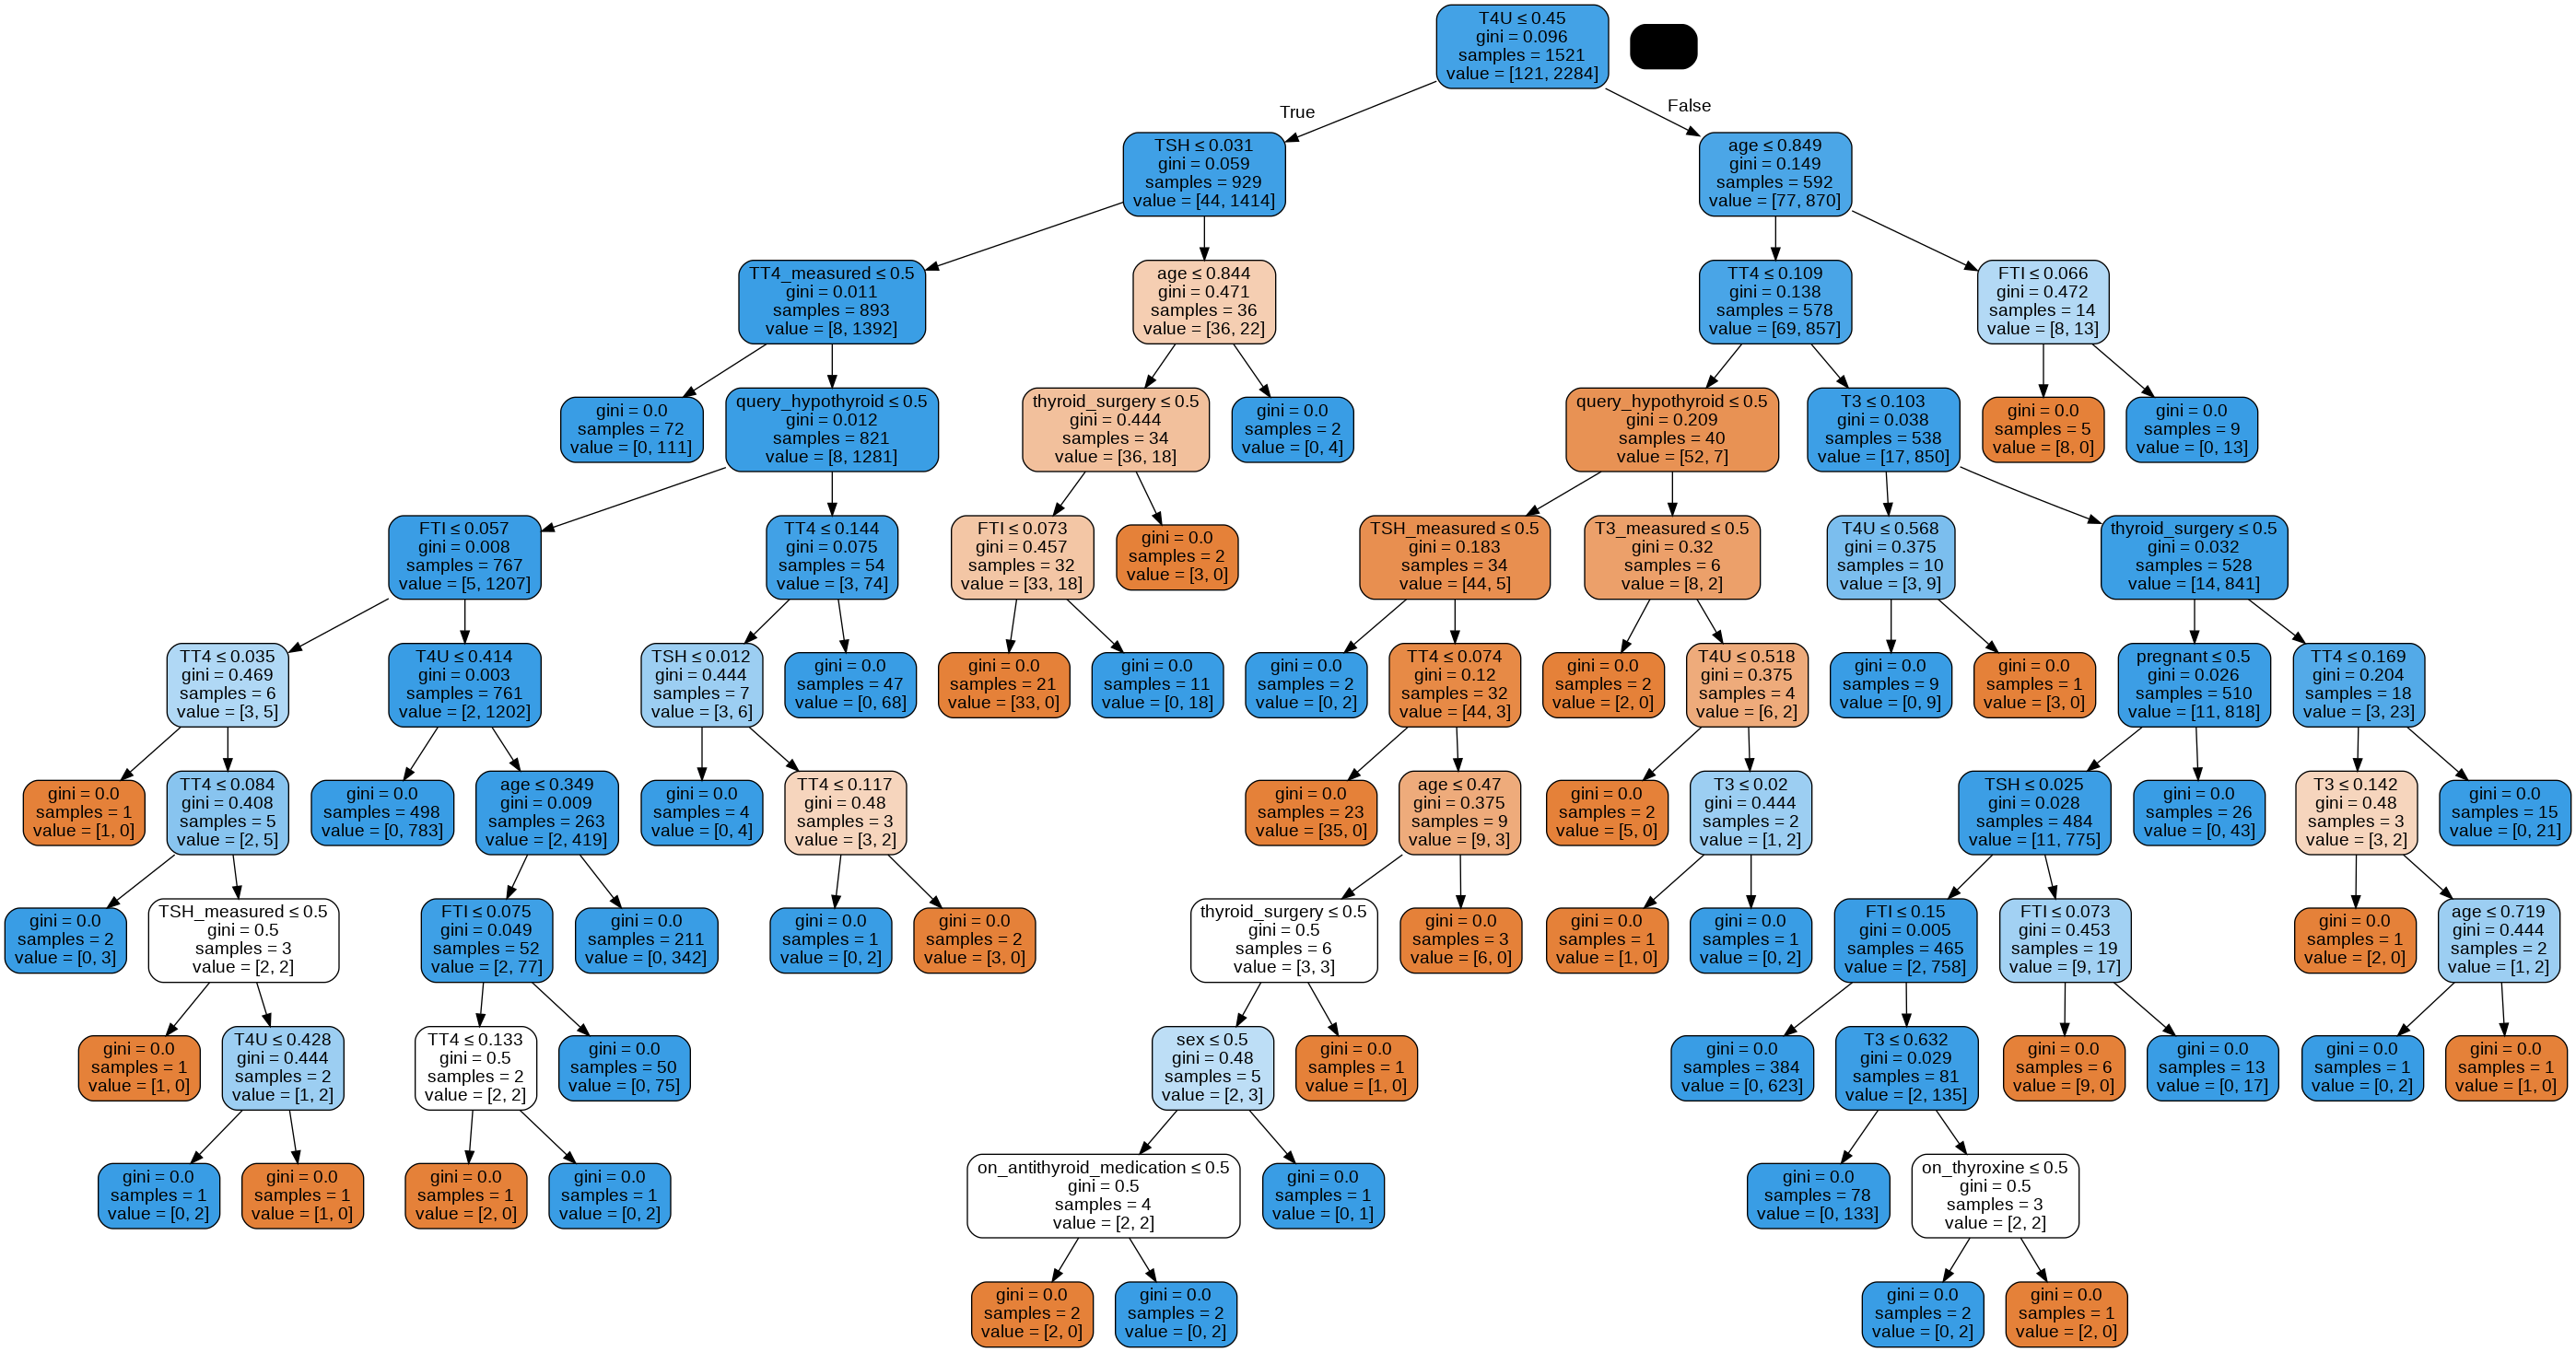

In [87]:
# Extracting a sample of trees from the forest
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = classifier.estimators_[0]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_forest.png')
Image(graph.create_png())

The algorithm calculates the level of impurity. In this case, it uses gini. When the gini is 0, it stops splitting because the impurity is very minimal.

### c. Adaboosted Trees

is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import  KFold, cross_val_score

k_folds = KFold(n_splits=20, random_state=0, shuffle=True)

estimators = [20, 30, 50, 70, 90]

for i in estimators:
    ada_boost = AdaBoostClassifier(n_estimators=i, random_state=0)
    results = cross_val_score(ada_boost, X_train, y_train, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 20 estimators:
0.989197658402204
Results for 30 estimators:
0.9891942148760332
Results for 50 estimators:
0.9887775482093666
Results for 70 estimators:
0.9887775482093666
Results for 90 estimators:
0.9879442148760333


The accuracies depending on the number of estimators do not differ a lot.

## ii. Support Vector Machine

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they're able to categorize new text.
Inorder to get two most important features, we need to exclude the factores that are highly correlated as well as those that are lowly correlated.
Another way is to use the feature importance method.

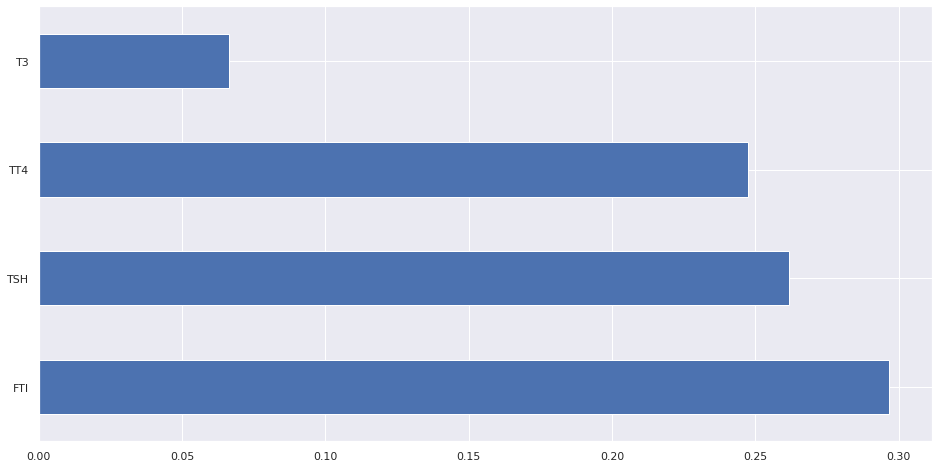

In [44]:
# plotting feature importances
# Using random forest decision tree to get the important features
# Spliting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(data2.drop('status', axis=1), data2['status'], test_size=0.2, random_state=0)

rf =  RandomForestClassifier(n_estimators=30, random_state=0)
features = data2.drop('status',axis='columns')
rf.fit(X_train, y_train)
importances = rf.feature_importances_


(pd.Series(rf.feature_importances_, index=X.columns)
   .nlargest(4)
   .plot(kind='barh'))  



The important features to use in SVM are FTI and TSH.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


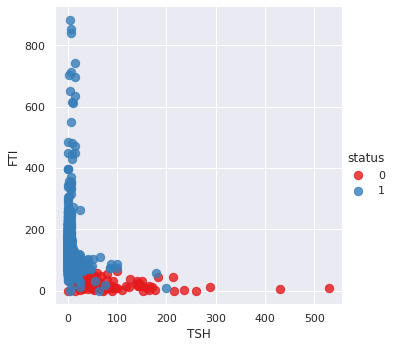

In [45]:
# Plot the two features
sns.lmplot('TSH', 'FTI', data=data2, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [46]:
# Seperating the target from our data
X = data2.drop(['status'],axis=1) 
y = data2.status

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.shape


(602,)

In [47]:
# Let's now build the svm model 
from sklearn.svm import SVC,LinearSVC
hypo_model = SVC(kernel = 'linear')
# Train the model using the training set
hypo_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = hypo_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [48]:
# Checking the accuracy of the model
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy





0.9833887043189369

98.33% is a good score

In [49]:
# For further evaluation you can also check the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 19,   6],
       [  4, 573]])

In [66]:
# hyperparameter tuning to see whether the accuracy increases
from sklearn.metrics import mean_squared_error

hypo_model11 = SVC(kernel = 'linear', C = 4000, gamma = 0.0001)
# Train the model using the training set
hypo_model11.fit(X_train,y_train)

# Predict the response for the test set
y_pred1 = hypo_model11.predict(X_test)
y_pred1

# measure accuracy of estimator by RMSE metric
np.sqrt(mean_squared_error(y_test, y_pred1))


0.12227087189088337

The error is 12.22%, which is minimal. Therefore it is a good idea to tune hyperparameters for more accuracy.

In [50]:
# kernel SVC (polynomial)
from sklearn.svm import SVC
hypo_model3 = SVC(kernel='poly', degree=3)
hypo_model3.fit(X_train, y_train)

SVC(kernel='poly')

In [67]:
# Making predictions
y_pred = hypo_model3.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [52]:
# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 12  13]
 [  3 574]]
              precision    recall  f1-score   support

           0       0.80      0.48      0.60        25
           1       0.98      0.99      0.99       577

    accuracy                           0.97       602
   macro avg       0.89      0.74      0.79       602
weighted avg       0.97      0.97      0.97       602



The F1 score is close to 1, hence a good model

In [68]:
# Hyperparameter tuning to see the accuracy changes
hypo_model33 = SVC(kernel = 'poly', C = 1000, gamma = 0.0001 )
# Train the model using the training set
hypo_model33.fit(X_train,y_train)

# Predict the response for the test set
y_pred3 = hypo_model33.predict(X_test)
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [69]:
# algorithm evaluation
np.sqrt(mean_squared_error(y_test, y_pred3))

0.12227087189088337

In [53]:
# Evaluating the Gaussian kernel
from sklearn.svm import SVC
hypo_model4 = SVC(kernel='rbf')
hypo_model4.fit(X_train, y_train)

SVC()

In [71]:
# Making predictions
y_pred= hypo_model4.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [55]:
# Algorithm evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 18   7]
 [  4 573]]
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        25
           1       0.99      0.99      0.99       577

    accuracy                           0.98       602
   macro avg       0.90      0.86      0.88       602
weighted avg       0.98      0.98      0.98       602



The F1 score is close to 1, making it a good model.

In [72]:
# tuning hyperparameters
hypo_model44 = SVC(kernel='rbf',C = 1000, gamma = 0.005)
hypo_model44.fit(X_train, y_train)

y_pred4 = hypo_model44.predict(X_test)

In [73]:
# Algorithm evaluation
np.sqrt(mean_squared_error(y_test, y_pred4))


0.12888481555661677

The error is 12.88%, when the gamma coefficient increased.

The three algorithms of support vector machine is the rbf. This is because it has hyperparameters that can be tuned to get the best accuracy score. The transformation done on the algorithms is adding hyperparameters (C and gamma) and evaluating the accuracy score compared to the base model. 

# CONCLUSION

The best way to increase the algorithm performance is to ensure cross-validation.

In gradient boosting, increase in number of estimators increases the level of accuracy of the model.

The best algorithm is the gradient boosting because it learns and becomes stronger. Also, its accuracy can be handled by the number of estimators in the model.

Another way to improve algorihm performance is to conduct hyper-parametr tuning to get the best hyperparameter, hence the best model. This is clearly shown in the transformation of the rbf model of SVM.

# RECOMMENDATION

For every algorithm, it is a good practice to tune hyperparameters for a better model.

Always practice cross-validation for a good model.

When using the gradient boosting algorithm, always increase the number of estimators.